## Problem Statement

### Business Context

An over-the-top (OTT) media service is a media service offered directly to viewers via the internet. The term is most synonymous with subscription-based video-on-demand services that offer access to film and television content, including existing series acquired from other producers, as well as original content produced specifically for the service. They are typically accessed via websites on personal computers, apps on smartphones and tablets, or televisions with integrated Smart TV platforms.

Presently, OTT services are at a relatively nascent stage and are widely accepted as a trending technology across the globe. With the increasing change in customers' social behavior, which is shifting from traditional subscriptions to broadcasting services and OTT on-demand video and music subscriptions every year, OTT streaming is expected to grow at a very fast pace. The global OTT market size was valued at $121.61 billion in 2019 and is projected to reach $1,039.03 billion by 2027, growing at a CAGR of 29.4% from 2020 to 2027. The shift from television to OTT services for entertainment is driven by benefits such as on-demand services, ease of access, and access to better networks and digital connectivity.

With the outbreak of COVID19, OTT services are striving to meet the growing entertainment appetite of viewers, with some platforms already experiencing a 46% increase in consumption and subscriber count as viewers seek fresh content. With innovations and advanced transformations, which will enable the customers to access everything they want in a single space, OTT platforms across the world are expected to increasingly attract subscribers on a concurrent bauros

### Objective

ShowTime is an OTT service provider and offers a wide variety of content (movies, web shows, etc.) for its users. They want to determine the driver variables for first-day content viewership so that they can take necessary measures to improve the viewership of the content on their platform. Some of the reasons for the decline in viewership of content would be the decline in the number of people coming to the platform, decreased marketing spend, content timing clashes, weekends and holidays, etc. They have hired you as a Data Scientist, shared the data of the current content in their platform, and asked you to analyze the data and come up with a linear regression model to determine the driving factors for first-day viewership.uros

### Data Description

The data contains the different factors to analyze for the content. The detailed data dictionary is given below:-

- visitors: Average number of visitors, in millions, to the platform in the past week
- ad_impressions: Number of ad impressions, in millions, across all ad campaigns for the content (running and completed)
- major_sports_event: Any major sports event on the day
- genre: Genre of the content
- dayofweek: Day of the release of the content
- season: Season of the release of the content
- views_trailer: Number of views, in millions, of the content trailer
- views_content: Number of first-day views, in millions, of the content

### Questions to be Answered as part of EDA

The following questions need to be answered as a part of the EDA section of the project:-

1. What does the distribution of content views look like?
2. What does the distribution of genres look like?
3. The day of the week on which content is released generally plays a key role in the viewership. How does the viewership vary with the day of release?
4. How does the viewership vary with the season of release?
5. What is the correlation between trailer views and content views?

Kindly ensure to thoroughly examine all variables of the data in EDA, going beyond the above questions.stions.content

### Rubric

The following questions need to be answered as a part of the EDA section of the project:-

1. Exploratory Data Analysis
2. Data preprocessing
3. Model building - Linear Regression
4. Testing the assumptions of linear regression model
5. Model performance evaluation
6. Actionable Insights & Recommendations

## Importing necessary libraries

In [191]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [193]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [194]:
# loading data
import os
path = os.getcwd() + '\\ottdata.csv'
df = pd.read_csv(path)

## Data Overview

### Displaying the first few rows of the dataset

In [197]:
df.head()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.67,1113.81,0,Horror,Wednesday,Spring,56.70,0.51
1,1.46,1498.41,1,Thriller,Friday,Fall,52.69,0.32
2,1.47,1079.19,1,Thriller,Wednesday,Fall,48.74,0.39
3,1.85,1342.77,1,Sci-Fi,Friday,Fall,49.81,0.44
4,1.46,1498.41,0,Sci-Fi,Sunday,Winter,55.83,0.46


### Checking the shape of the dataset

In [199]:
df.shape

(1000, 8)

### Checking the data types of the columns for the dataset

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visitors            1000 non-null   float64
 1   ad_impressions      1000 non-null   float64
 2   major_sports_event  1000 non-null   int64  
 3   genre               1000 non-null   object 
 4   dayofweek           1000 non-null   object 
 5   season              1000 non-null   object 
 6   views_trailer       1000 non-null   float64
 7   views_content       1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [202]:
#Change Int Data-type to object for major_sports_event
df[['major_sports_event']] = df[['major_sports_event']].astype(object)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visitors            1000 non-null   float64
 1   ad_impressions      1000 non-null   float64
 2   major_sports_event  1000 non-null   object 
 3   genre               1000 non-null   object 
 4   dayofweek           1000 non-null   object 
 5   season              1000 non-null   object 
 6   views_trailer       1000 non-null   float64
 7   views_content       1000 non-null   float64
dtypes: float64(4), object(4)
memory usage: 62.6+ KB


### Statistical summary of the dataset

In [204]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
visitors,1000.0,NaN,NaN,NaN,1.70429,0.231973,1.25,1.55,1.7,1.83,2.34
ad_impressions,1000.0,NaN,NaN,NaN,1434.71229,289.534834,1010.87,1210.33,1383.58,1623.67,2424.2
major_sports_event,1000.0,2.0,0.0,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genre,1000,8,Others,255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dayofweek,1000,7,Friday,369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,1000,4,Winter,257,NaN,NaN,NaN,NaN,NaN,NaN,NaN
views_trailer,1000.0,NaN,NaN,NaN,66.91559,35.00108,30.08,50.9475,53.96,57.755,199.92
views_content,1000.0,NaN,NaN,NaN,0.4734,0.105914,0.22,0.4,0.45,0.52,0.89


### Checking for duplicate values

In [206]:
print('Duplicated Values: ',df.duplicated().sum())

Duplicated Values:  0


### Checking for missing values

In [208]:
print('Missing Values:-\n')
df.isnull().sum()

Missing Values:-



visitors              0
ad_impressions        0
major_sports_event    0
genre                 0
dayofweek             0
season                0
views_trailer         0
views_content         0
dtype: int64

In [209]:
#print all columns
col = df.columns
print(col,'\n')

#Analyze each categorical attribute to check for any error in values
for i in col:
    if  df[i].dtypes == 'object':
        print('-'*100)
        print(i,':-\n')
        print('Unique Values =',df[i].unique(),'\n')
        print('Column Value Count',df[i].value_counts(),'\n')

#Data is clean & void of any error/missing values that requires treatment

Index(['visitors', 'ad_impressions', 'major_sports_event', 'genre',
       'dayofweek', 'season', 'views_trailer', 'views_content'],
      dtype='object') 

----------------------------------------------------------------------------------------------------
major_sports_event :-

Unique Values = [0 1] 

Column Value Count major_sports_event
0    600
1    400
Name: count, dtype: int64 

----------------------------------------------------------------------------------------------------
genre :-

Unique Values = ['Horror' 'Thriller' 'Sci-Fi' 'Others' 'Drama' 'Action' 'Comedy' 'Romance'] 

Column Value Count genre
Others      255
Comedy      114
Thriller    113
Drama       109
Romance     105
Sci-Fi      102
Horror      101
Action      101
Name: count, dtype: int64 

----------------------------------------------------------------------------------------------------
dayofweek :-

Unique Values = ['Wednesday' 'Friday' 'Sunday' 'Thursday' 'Monday' 'Saturday' 'Tuesday'] 

Column Value Count 

In [210]:
# creating a copy of the data so that original data remains unchanged
df2 = df.copy()

# replace values 0 with 'No' & 1 with 'Yes' in major_sports_event
df2['major_sports_event'] = df2['major_sports_event'].replace(0,'No')
df2['major_sports_event'] = df2['major_sports_event'].replace(1,'Yes')

for i in col:
    if  df2[i].dtypes == 'object':
        print('-'*100)
        print(i,':-\n')
        print('Unique Values =',df2[i].unique(),'\n')
        print('Column Value Count',df2[i].value_counts(),'\n')

----------------------------------------------------------------------------------------------------
major_sports_event :-

Unique Values = ['No' 'Yes'] 

Column Value Count major_sports_event
No     600
Yes    400
Name: count, dtype: int64 

----------------------------------------------------------------------------------------------------
genre :-

Unique Values = ['Horror' 'Thriller' 'Sci-Fi' 'Others' 'Drama' 'Action' 'Comedy' 'Romance'] 

Column Value Count genre
Others      255
Comedy      114
Thriller    113
Drama       109
Romance     105
Sci-Fi      102
Horror      101
Action      101
Name: count, dtype: int64 

----------------------------------------------------------------------------------------------------
dayofweek :-

Unique Values = ['Wednesday' 'Friday' 'Sunday' 'Thursday' 'Monday' 'Saturday' 'Tuesday'] 

Column Value Count dayofweek
Friday       369
Wednesday    332
Thursday      97
Saturday      88
Sunday        67
Monday        24
Tuesday       23
Name: count, dtyp

## 1. Exploratory Data Analysis:-
Problem definition, questions to be answered. Data background and contents. Univariate analysis. Bivariate analysis. Answers to the key questions provided. Insights based on EDA

### Univariate Analysis

In [213]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [214]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

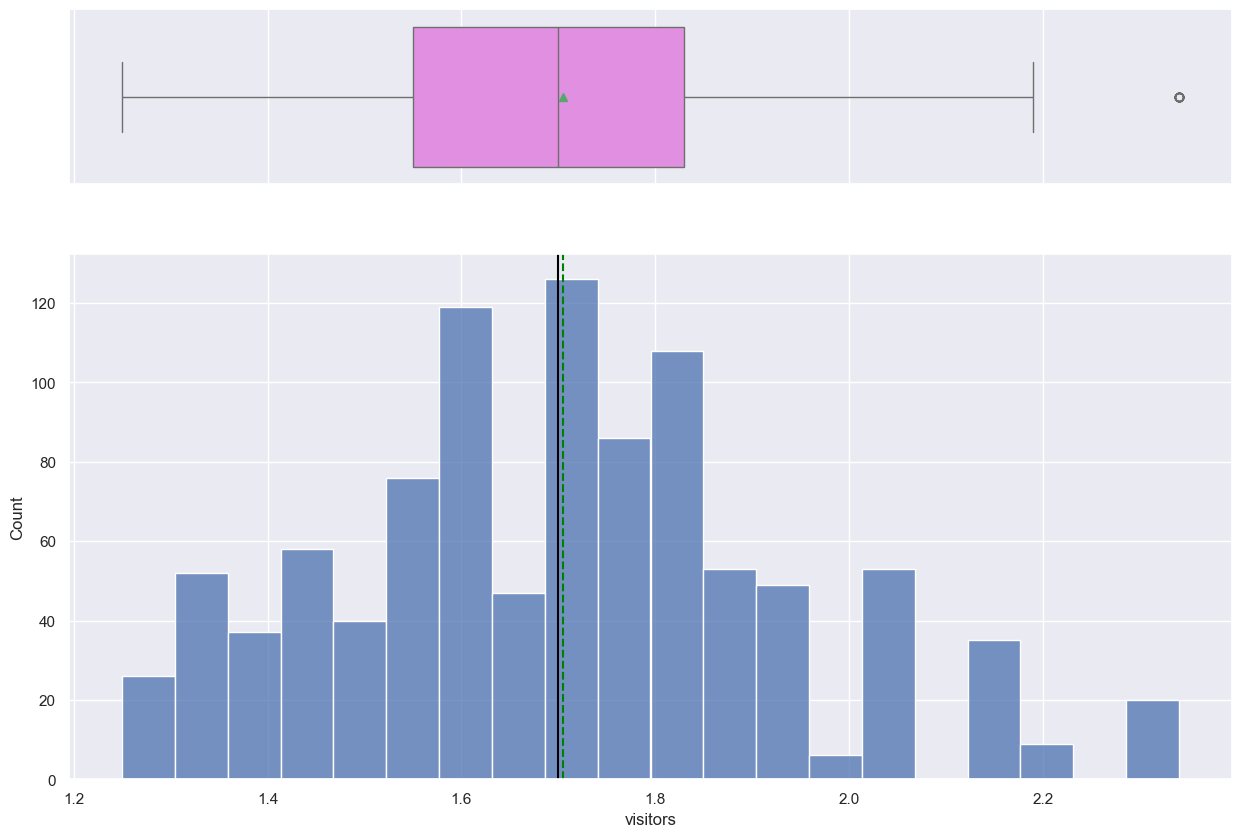

In [215]:
#1. visitors
histogram_boxplot(df2, "visitors")

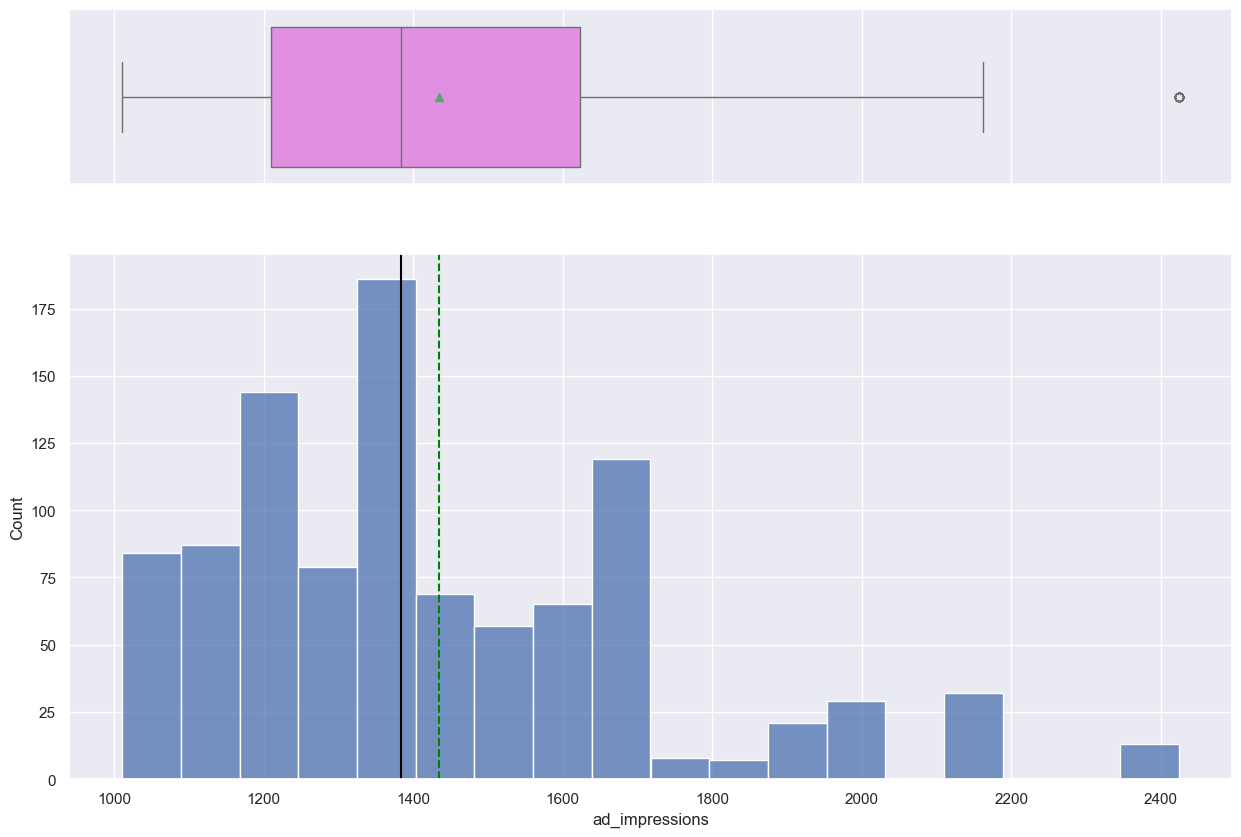

In [216]:
#2. ad_impressions
histogram_boxplot(df2, "ad_impressions")

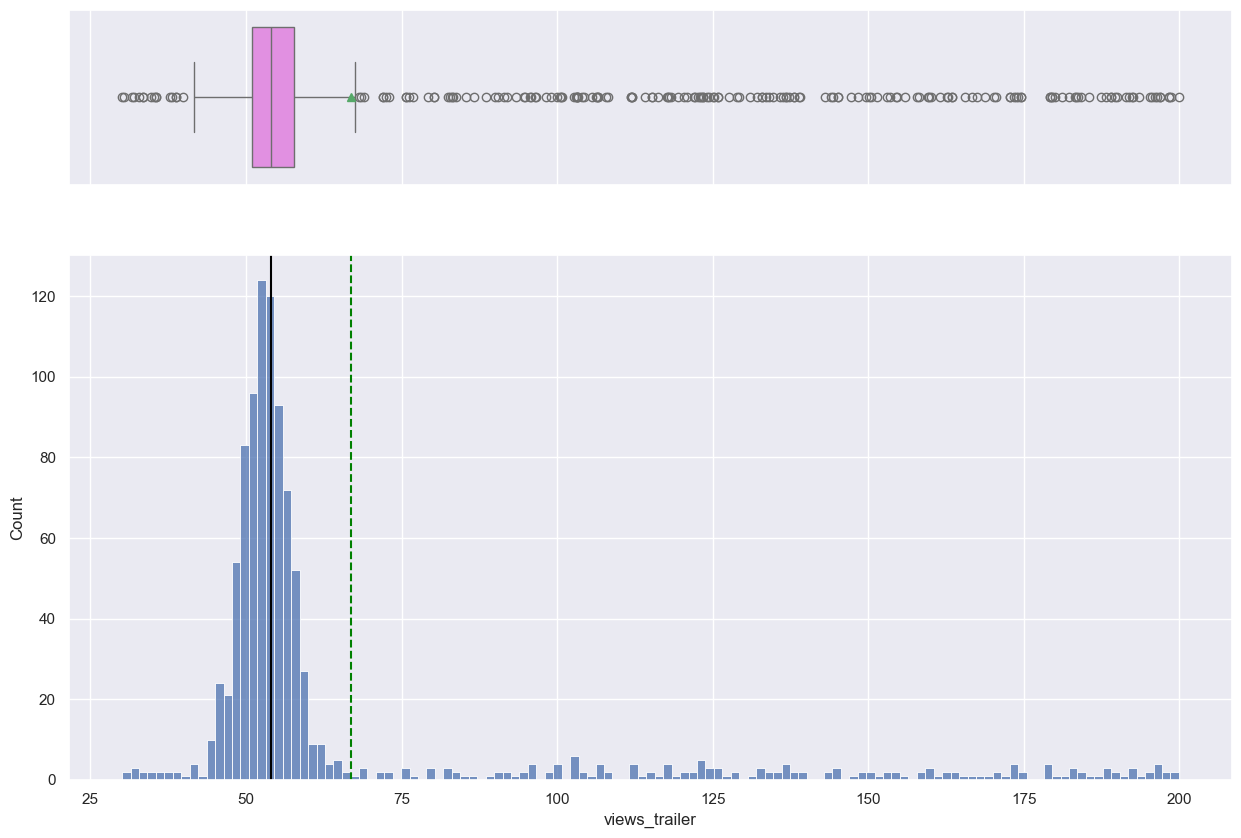

In [217]:
#3. views_trailer
histogram_boxplot(df2, "views_trailer")

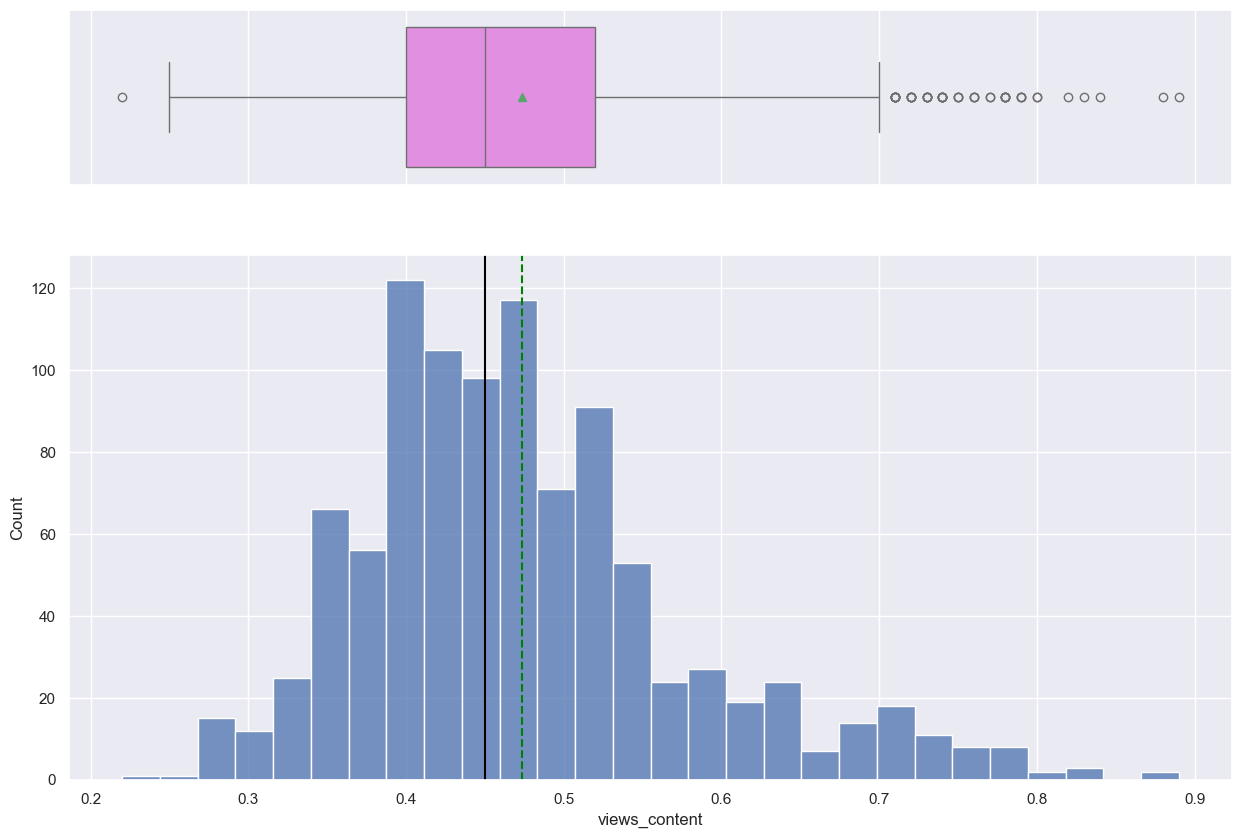

In [218]:
#4. views_content
histogram_boxplot(df2, "views_content")

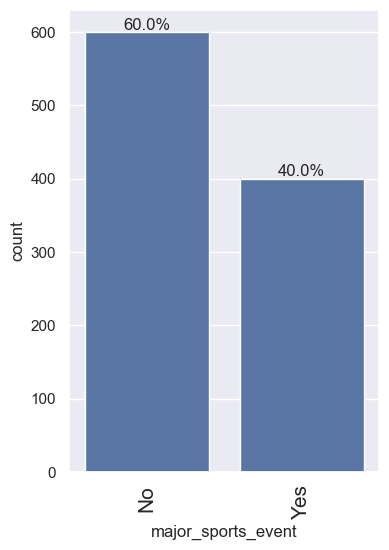

In [219]:
#5. major_sports_event
labeled_barplot(df2, "major_sports_event", perc = True)

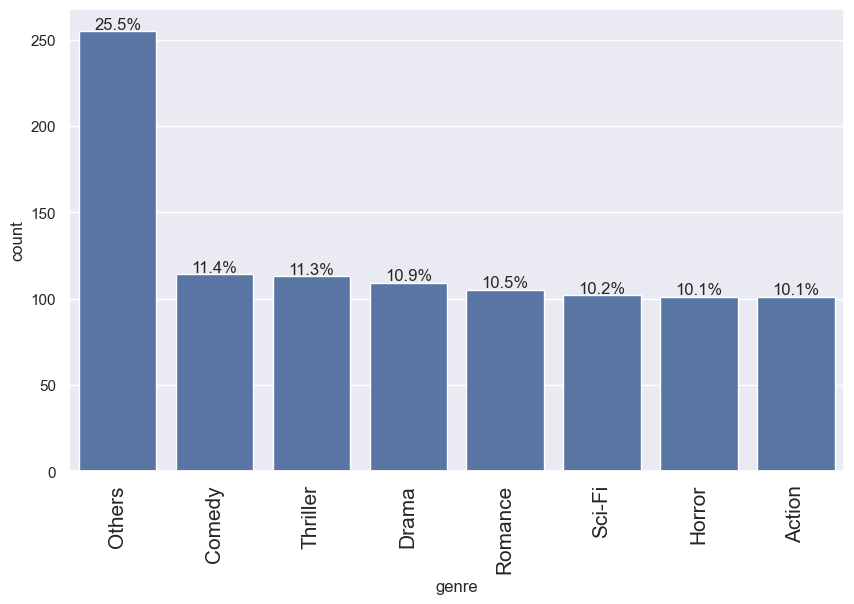

In [220]:
#6. genre
labeled_barplot(df2, "genre", perc = True)

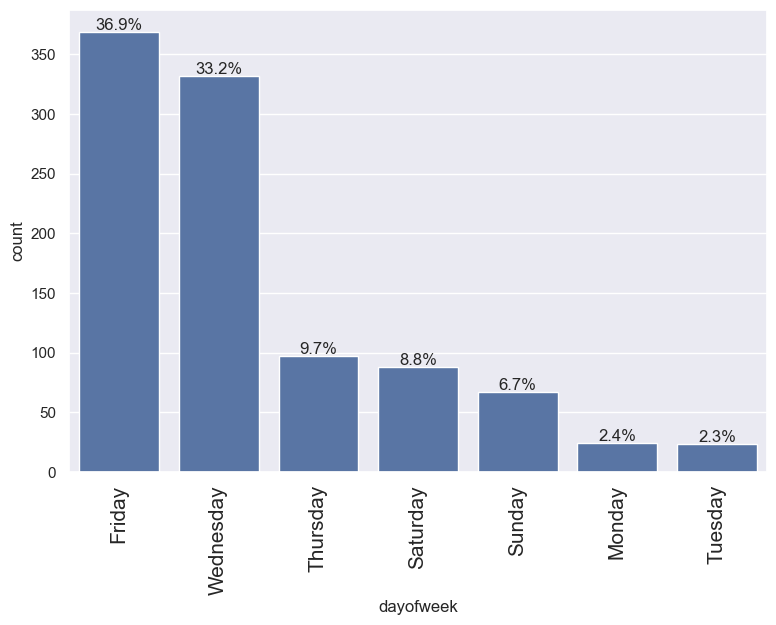

In [221]:
#7. dayofweek
labeled_barplot(df2, "dayofweek", perc = True)

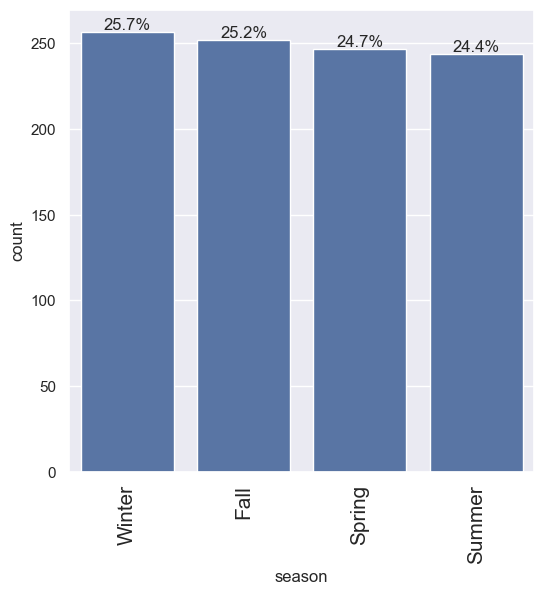

In [222]:
#8. season
labeled_barplot(df2, "season", perc = True)

### Bivariate Analysis

**Numerical Variables (Correlation-check)**

                                                    Pairplot of Numerical Variables


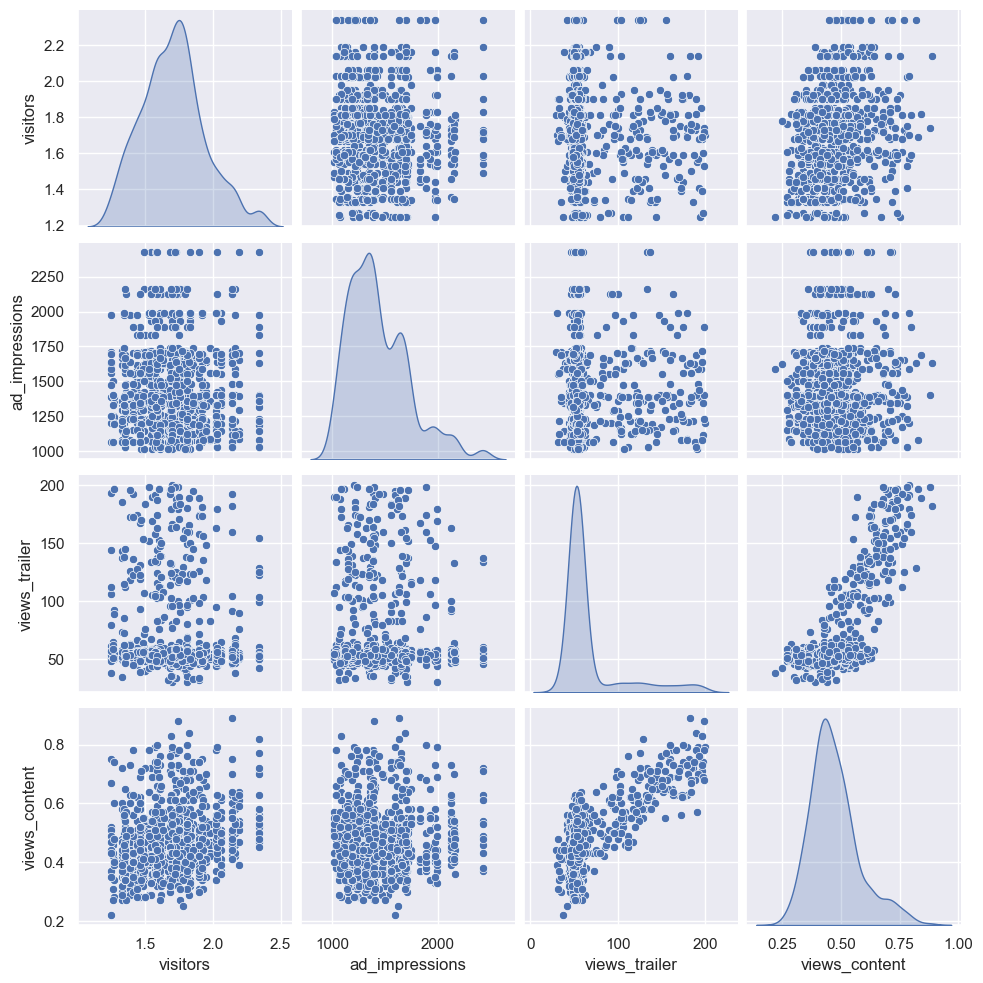

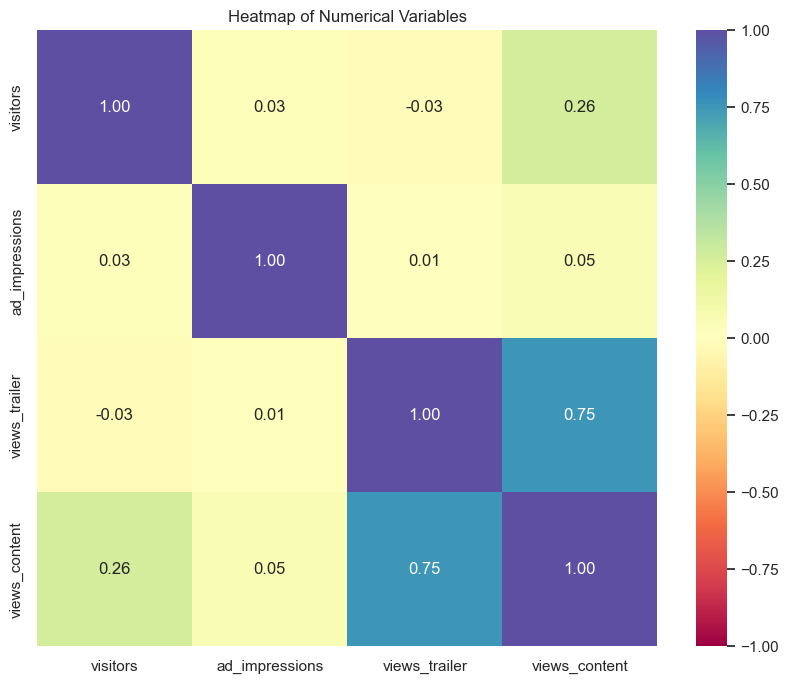

In [225]:
cols_list = df2.select_dtypes(include=np.number).columns.tolist()

#Plot the Pairplot
print('                                                    Pairplot of Numerical Variables')
sns.pairplot(df2[cols_list], diag_kind="kde")
plt.show()

#Plot the Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df2[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.title('Heatmap of Numerical Variables')
plt.show()

**Numerical vs Categorical Variables**

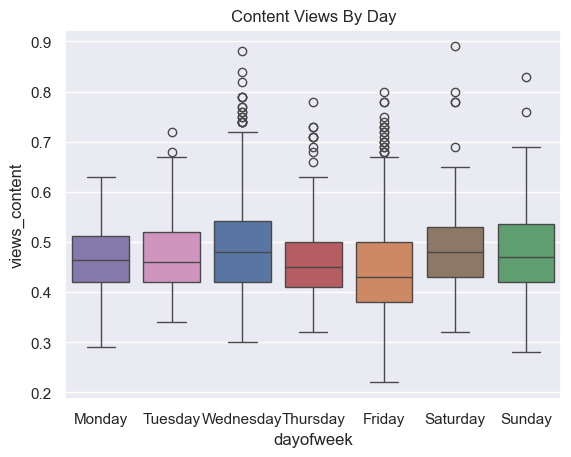

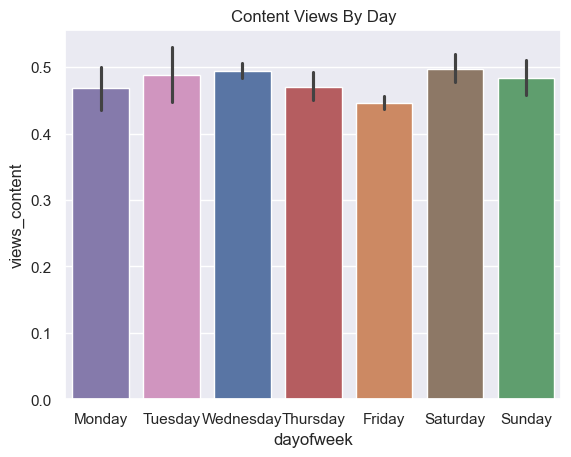

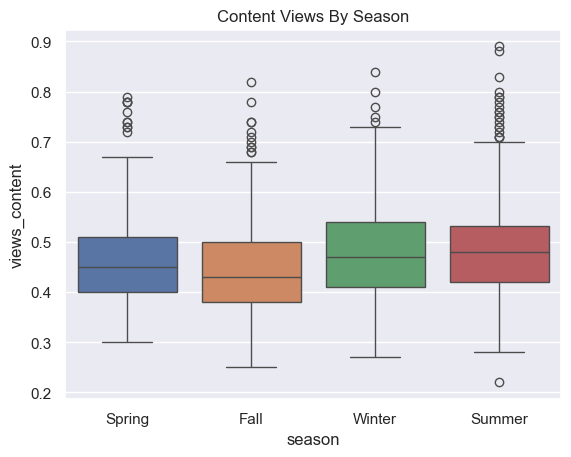

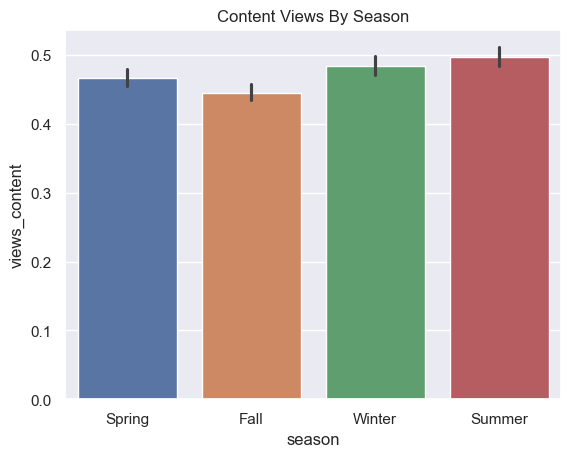

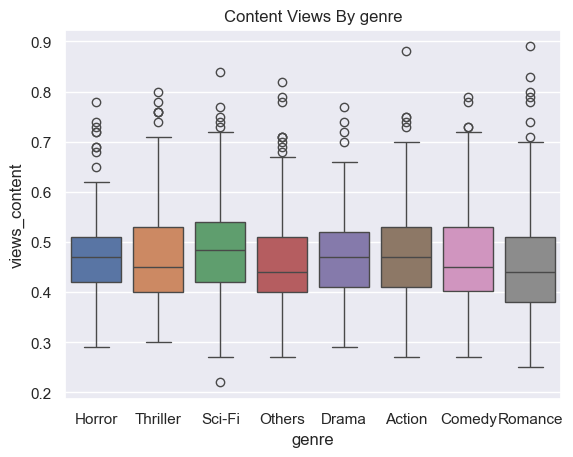

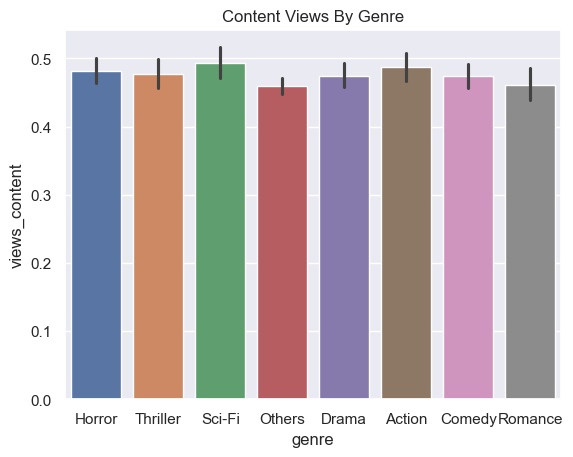

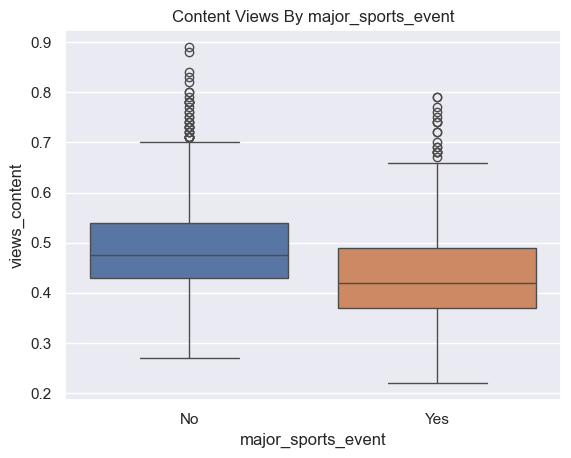

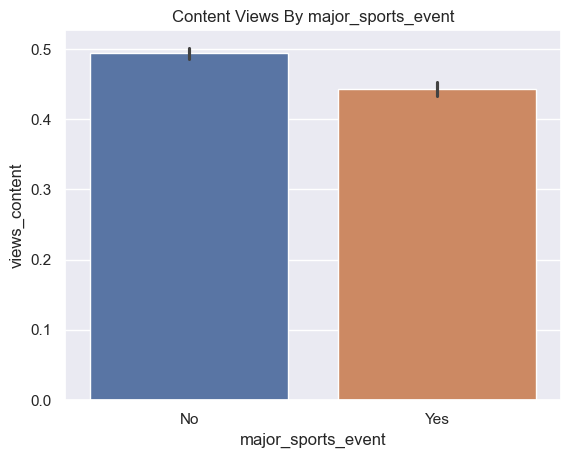

In [227]:
plt.title('Content Views By Day')
sns.boxplot(data=df2, x='dayofweek', y='views_content', hue = 'dayofweek', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()
sns.barplot(data=df2, x='dayofweek', y='views_content', hue='dayofweek', estimator = 'mean', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Content Views By Day')
plt.show()

plt.title('Content Views By Season')
sns.boxplot(data=df2, x='season', y='views_content', hue = 'season')
plt.show()
sns.barplot(data=df2, x='season', y='views_content', hue='season', estimator = 'mean')
plt.title('Content Views By Season')
plt.show()

plt.title('Content Views By genre')
sns.boxplot(data=df2, x='genre', y='views_content', hue = 'genre')
plt.show()
sns.barplot(data=df2, x='genre', y='views_content', hue='genre', estimator = 'mean')
plt.title('Content Views By Genre')
plt.show()

plt.title('Content Views By major_sports_event')
sns.boxplot(data=df2, x='major_sports_event', y='views_content', hue = 'major_sports_event')
plt.show()
sns.barplot(data=df2, x='major_sports_event', y='views_content', hue='major_sports_event', estimator = 'mean')
plt.title('Content Views By major_sports_event')
plt.show()

## 2. Data Preprocessing:-
Duplicate value check. Missing value treatment. Outlier treatment. Feature engineering. Data preparation for modeling.

### Missing/Duplicate/Error Value Treatment

In [230]:
# checking for missing values
df2.isnull().sum()

visitors              0
ad_impressions        0
major_sports_event    0
genre                 0
dayofweek             0
season                0
views_trailer         0
views_content         0
dtype: int64

In [231]:
# checking for duplicated values
df2.duplicated().sum()

0

### Feature Engineering

In [233]:
# already converted 'major_sports_event' into categorical variable with values 'Yes' & 'No'
df2['major_sports_event'].value_counts()

major_sports_event
No     600
Yes    400
Name: count, dtype: int64

### Outlier Treatment

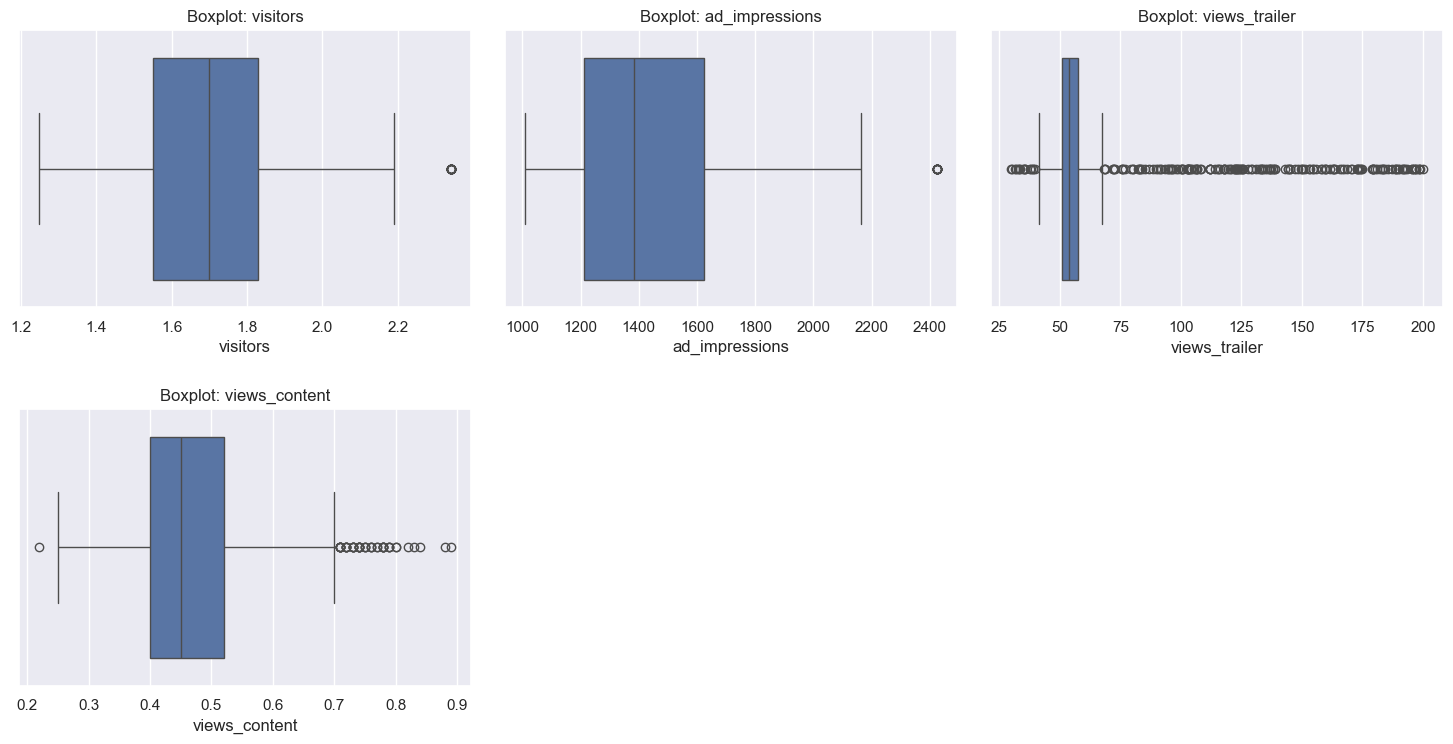

In [235]:
# outlier detection using boxplot
num_cols = df2.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, v in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    plt.title('Boxplot: %s' %v)
    sns.boxplot(data=df2, x=v)
    plt.tight_layout(pad=2)

plt.show()

In [236]:
# Define function to get Upper & Lower Whiskers of boxplot
def Whiskers(c):
    sorted(c)
    Q1,Q3 = np.percentile(c,[25,75])
    LW = Q1 - (Q3-Q1)*1.5
    UW = Q3 + (Q3-Q1)*1.5
    return LW,UW

In [237]:
# visitors: Calculate Outlier Count & Percentage
L_Whis,U_Whis = Whiskers(df2['visitors'])
UW_count = df2[df2['visitors']>U_Whis].shape[0]
LW_count = df2[df2['visitors']<L_Whis].shape[0]
Outlier_count = LW_count + UW_count
Col_count = df2['visitors'].shape[0]
Outlier_Percentage = (Outlier_count/Col_count)*100
print('Lower Wishker at',L_Whis,'| Upper Whisker at',U_Whis)
print('Lower Whisker Outlier Count =',LW_count)
print('Upper Whisker Outlier Count =',UW_count)
print('Total Outlier Count=',Outlier_count)
print('Outlier Percentage in visitors=',Outlier_Percentage,'%')

Lower Wishker at 1.13 | Upper Whisker at 2.25
Lower Whisker Outlier Count = 0
Upper Whisker Outlier Count = 20
Total Outlier Count= 20
Outlier Percentage in visitors= 2.0 %


In [238]:
# ad_impressions: Calculate Outlier Count & Percentage
L_Whis,U_Whis = Whiskers(df2['ad_impressions'])
UW_count = df2[df2['ad_impressions']>U_Whis].shape[0]
LW_count = df2[df2['ad_impressions']<L_Whis].shape[0]
Outlier_count = LW_count + UW_count
Col_count = df2['ad_impressions'].shape[0]
Outlier_Percentage = (Outlier_count/Col_count)*100
print('Lower Wishker at',L_Whis,'| Upper Whisker at',U_Whis)
print('Lower Whisker Outlier Count =',LW_count)
print('Upper Whisker Outlier Count =',UW_count)
print('Total Outlier Count=',Outlier_count)
print('Outlier Percentage in ad_impressions=',Outlier_Percentage,'%')

Lower Wishker at 590.3199999999997 | Upper Whisker at 2243.6800000000003
Lower Whisker Outlier Count = 0
Upper Whisker Outlier Count = 13
Total Outlier Count= 13
Outlier Percentage in ad_impressions= 1.3 %


In [239]:
# views_trailer: Calculate Outlier Count & Percentage
L_Whis,U_Whis = Whiskers(df2['views_trailer'])
UW_count = df2[df2['views_trailer']>U_Whis].shape[0]
LW_count = df2[df2['views_trailer']<L_Whis].shape[0]
Outlier_count = LW_count + UW_count
Col_count = df2['views_trailer'].shape[0]
Outlier_Percentage = (Outlier_count/Col_count)*100
print('Lower Wishker at',L_Whis,'| Upper Whisker at',U_Whis)
print('Lower Whisker Outlier Count =',LW_count)
print('Upper Whisker Outlier Count =',UW_count)
print('Total Outlier Count=',Outlier_count)
print('Outlier Percentage in views_trailer=',Outlier_Percentage,'%')

Lower Wishker at 40.73625000000002 | Upper Whisker at 67.96624999999997
Lower Whisker Outlier Count = 16
Upper Whisker Outlier Count = 173
Total Outlier Count= 189
Outlier Percentage in views_trailer= 18.9 %


In [240]:
# views_content: Calculate Outlier Count & Percentage
L_Whis,U_Whis = Whiskers(df2['views_content'])
UW_count = df2[df2['views_content']>U_Whis].shape[0]
LW_count = df2[df2['views_content']<L_Whis].shape[0]
Outlier_count = LW_count + UW_count
Col_count = df2['views_content'].shape[0]
Outlier_Percentage = (Outlier_count/Col_count)*100
print('Lower Wishker at',L_Whis,'| Upper Whisker at',U_Whis)
print('Lower Whisker Outlier Count =',LW_count)
print('Upper Whisker Outlier Count =',UW_count)
print('Total Outlier Count=',Outlier_count)
print('Outlier Percentage in views_content=',Outlier_Percentage,'%')

# There are a few outliers in the data. However, we will not treat them as they are proper values.

Lower Wishker at 0.22000000000000003 | Upper Whisker at 0.7
Lower Whisker Outlier Count = 1
Upper Whisker Outlier Count = 46
Total Outlier Count= 47
Outlier Percentage in views_content= 4.7 %


### Data Preparation for Modeling

In [242]:
# defining x and y variables
x = df2.drop(["views_content"], axis=1)
y = df2["views_content"]

print(x.head())
print()
print(y.head())

   visitors  ad_impressions major_sports_event     genre  dayofweek  season  \
0      1.67         1113.81                 No    Horror  Wednesday  Spring   
1      1.46         1498.41                Yes  Thriller     Friday    Fall   
2      1.47         1079.19                Yes  Thriller  Wednesday    Fall   
3      1.85         1342.77                Yes    Sci-Fi     Friday    Fall   
4      1.46         1498.41                 No    Sci-Fi     Sunday  Winter   

   views_trailer  
0          56.70  
1          52.69  
2          48.74  
3          49.81  
4          55.83  

0    0.51
1    0.32
2    0.39
3    0.44
4    0.46
Name: views_content, dtype: float64


In [243]:
# let's add the intercept to data
x = sm.add_constant(x)
x.head()

,const,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer
0,1.0,1.67,1113.81,No,Horror,Wednesday,Spring,56.70
1,1.0,1.46,1498.41,Yes,Thriller,Friday,Fall,52.69
2,1.0,1.47,1079.19,Yes,Thriller,Wednesday,Fall,48.74
3,1.0,1.85,1342.77,Yes,Sci-Fi,Friday,Fall,49.81
4,1.0,1.46,1498.41,No,Sci-Fi,Sunday,Winter,55.83


In [244]:
# creating dummy variables
x = pd.get_dummies(x, columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),drop_first=True)
x.head()

,const,visitors,ad_impressions,views_trailer,major_sports_event_Yes,genre_Comedy,genre_Drama,genre_Horror,genre_Others,genre_Romance,...,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
0,1.0,1.67,1113.81,56.70,False,False,False,True,False,False,...,False,False,False,False,False,False,True,True,False,False
1,1.0,1.46,1498.41,52.69,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,1.0,1.47,1079.19,48.74,True,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,1.0,1.85,1342.77,49.81,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1.0,1.46,1498.41,55.83,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True


In [245]:
# converting the input attributes into float type for modeling
x = x.astype(float)
x.T

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
const,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
visitors,1.67,1.46,1.47,1.85,1.46,1.61,1.80,1.58,1.70,1.78,...,1.81,1.26,1.57,2.03,1.46,1.58,1.34,1.62,2.06,1.36
ad_impressions,1113.81,1498.41,1079.19,1342.77,1498.41,1588.38,1311.96,1690.43,1498.41,1336.16,...,1119.90,1402.24,1383.58,1190.25,1342.77,1311.96,1329.48,1359.80,1698.35,1140.23
views_trailer,56.70,52.69,48.74,49.81,55.83,49.72,48.15,56.11,51.91,48.22,...,57.09,58.78,104.37,55.86,122.57,48.58,72.42,150.44,48.72,52.94
major_sports_event_Yes,0.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,1.00,0.00,...,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00
genre_Comedy,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
genre_Drama,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
genre_Horror,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
genre_Others,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
genre_Romance,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00


In [246]:
# splitting the data in 70:30 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [247]:
print("Number of rows in Train dataset =", x_train.shape[0])
print("Number of rows in Test dataset =", x_test.shape[0])

Number of rows in Train dataset = 700
Number of rows in Test dataset = 300


## 3. Model Building - Linear Regression:-
Build the model and comment on the model statistics. Display model coefficients with column names.

### Build Model

In [250]:
# Display training set
x_train

,const,visitors,ad_impressions,views_trailer,major_sports_event_Yes,genre_Comedy,genre_Drama,genre_Horror,genre_Others,genre_Romance,...,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
731,1.0,1.64,1992.53,49.62,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
716,1.0,1.69,2158.03,132.93,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
640,1.0,1.47,1229.35,54.13,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
804,1.0,1.49,1010.87,106.62,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
737,1.0,2.19,1119.90,52.04,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,1.0,1.57,1323.74,55.61,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
72,1.0,1.77,1700.04,54.98,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
908,1.0,1.54,1398.05,53.75,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
235,1.0,2.02,1284.86,94.84,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [251]:
# Build Regression Model
olsmodel1 = sm.OLS(y_train, x_train).fit()
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     129.0
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          1.32e-215
Time:                        14:58:45   Log-Likelihood:                 1124.6
No. Observations:                 700   AIC:                            -2207.
Df Residuals:                     679   BIC:                            -2112.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [252]:
# let's check the model parameters (i.e. model coefficients with column names)
olsmodel1.params

const                     0.060157
visitors                  0.129451
ad_impressions            0.000004
views_trailer             0.002330
major_sports_event_Yes   -0.060326
genre_Comedy              0.009352
genre_Drama               0.012625
genre_Horror              0.009862
genre_Others              0.006325
genre_Romance             0.000551
genre_Sci-Fi              0.013143
genre_Thriller            0.008708
dayofweek_Monday          0.033662
dayofweek_Saturday        0.057887
dayofweek_Sunday          0.036321
dayofweek_Thursday        0.017289
dayofweek_Tuesday         0.022837
dayofweek_Wednesday       0.047376
season_Spring             0.022602
season_Summer             0.044203
season_Winter             0.027161
dtype: float64

In [253]:
# Lets write the interim equation of linear regression
Equation = "views_content ="
print(Equation, end=" ")
for i in range(len(x_train.columns)):
    if i == 0:
        print(olsmodel1.params[i], "+", end=" ")
    elif i != len(x_train.columns) - 1:
        print(
            olsmodel1.params[i],
            "* (",
            x_train.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsmodel1.params[i], "* (", x_train.columns[i], ")")

views_content = 0.0601565517494681 + 0.1294505744423475 * ( visitors ) +  3.6231483229941107e-06 * ( ad_impressions ) +  0.0023296732638245334 * ( views_trailer ) +  -0.0603260919574294 * ( major_sports_event_Yes ) +  0.009352182723248822 * ( genre_Comedy ) +  0.012625081979422553 * ( genre_Drama ) +  0.009862438834606128 * ( genre_Horror ) +  0.006325042184391273 * ( genre_Others ) +  0.0005509751584567429 * ( genre_Romance ) +  0.013143426559714788 * ( genre_Sci-Fi ) +  0.008707503270430399 * ( genre_Thriller ) +  0.033661631397537355 * ( dayofweek_Monday ) +  0.05788749657271275 * ( dayofweek_Saturday ) +  0.03632087548608467 * ( dayofweek_Sunday ) +  0.01728908621675788 * ( dayofweek_Thursday ) +  0.022836918485820683 * ( dayofweek_Tuesday ) +  0.04737607155228765 * ( dayofweek_Wednesday ) +  0.022602339842472906 * ( season_Spring ) +  0.0442034460193336 * ( season_Summer ) +  0.027161220661786764 * ( season_Winter )


C:\Users\Maheep-Zephyrus\AppData\Local\Temp\ipykernel_36224\3676278281.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(olsmodel1.params[i], "+", end=" ")
C:\Users\Maheep-Zephyrus\AppData\Local\Temp\ipykernel_36224\3676278281.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  olsmodel1.params[i],
C:\Users\Maheep-Zephyrus\AppData\Local\Temp\ipykernel_36224\3676278281.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  prin

### Model Performance Check

**Let's check the performance of the model using different metrics.**

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.    
* We will create a function which will print out all the above metrics in one go.

In [256]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [257]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train, y_train)
olsmodel1_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.04853,0.038197,0.791616,0.785162,8.55644


In [258]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(olsmodel1, x_test, y_test)
olsmodel1_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.050603,0.040782,0.766447,0.748804,9.030464


**Observations**

- The training $R^2$ is 0.76, so the model is not underfitting

- The train and test RMSE and MAE are comparable, so the model is not overfitting either

- MAE suggests that the model can predict content views within a mean error of 0.04 on the test data

- MAPE of 9.03 on the test data means that we are able to predict within 9.03% of the content views

## 4. Testing the Assumptions of Linear Regression Model

We will be checking the following Linear Regression assumptions:

A. **No Multicollinearity**

B. **Linearity of variables**

C. **Independence of error terms**

D. **Normality of error terms**

E. **No Heteroscedasticity**

### Test for Multicollinearty


- We will test for multicollinearity using VIF.

- **General Rule of thumb**:
    - If VIF is 1 then there is no correlation between the $k$th predictor and the remaining predictor variables.
    - If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
    - If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

Let's define a function to check VIF.

In [265]:
#Let's define a function to check VIF.

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [266]:
checking_vif(x_train)

,feature,VIF
0,const,99.679317
1,visitors,1.027837
2,ad_impressions,1.029390
3,views_trailer,1.023551
4,major_sports_event_Yes,1.065689
5,genre_Comedy,1.917635
6,genre_Drama,1.926699
7,genre_Horror,1.904460
8,genre_Others,2.573779
9,genre_Romance,1.753525


### A1. Removing Multicollinearity (if needed)



To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [269]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

# there is no need to treat multicollinearity as none of the VIFs is greater than 5.

### A2. Dropping high p-value variables (if needed)

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

In [271]:
# initial list of columns
predictors = x_train.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

i = 1
while len(cols) > 0:

    # defining the train set
    x_train_temp = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_temp).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)
    # name of the variable with maximum p-value
    feature_pmax = p_values.idxmax()


    if max_p_value > 0.05:
        cols.remove(feature_pmax)
        print('------- Iteration ',i,' -------')
        print('Removed ',feature_pmax,' with p value ',round(max_p_value,3))
    else:
        break
    i = i + 1

selected_features = cols
print('\nFeatures after dropping high p_value variables:- \n',selected_features)

------- Iteration  1  -------
Removed  genre_Romance  with p value  0.948
------- Iteration  2  -------
Removed  ad_impressions  with p value  0.582
------- Iteration  3  -------
Removed  genre_Others  with p value  0.298
------- Iteration  4  -------
Removed  genre_Thriller  with p value  0.409
------- Iteration  5  -------
Removed  genre_Comedy  with p value  0.427
------- Iteration  6  -------
Removed  genre_Horror  with p value  0.48
------- Iteration  7  -------
Removed  genre_Drama  with p value  0.267
------- Iteration  8  -------
Removed  genre_Sci-Fi  with p value  0.285
------- Iteration  9  -------
Removed  dayofweek_Tuesday  with p value  0.075

Features after dropping high p_value variables:- 
 ['const', 'visitors', 'views_trailer', 'major_sports_event_Yes', 'dayofweek_Monday', 'dayofweek_Saturday', 'dayofweek_Sunday', 'dayofweek_Thursday', 'dayofweek_Wednesday', 'season_Spring', 'season_Summer', 'season_Winter']


In [272]:
# Updated Test & Train data with the specified columns
x_train2 = x_train[selected_features]
x_test2 = x_test[selected_features]

In [273]:
# Updated model with no multicollinearity and no insignificant predictors

olsmodel2 = sm.OLS(y_train, x_train2).fit()
print(olsmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     233.8
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          7.03e-224
Time:                        14:58:46   Log-Likelihood:                 1120.2
No. Observations:                 700   AIC:                            -2216.
Df Residuals:                     688   BIC:                            -2162.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [274]:
# lets evaluate performance of the model after above changes

# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(olsmodel2, x_train2, y_train)
olsmodel2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.048841,0.038385,0.788937,0.785251,8.595246


In [275]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression(olsmodel2, x_test2, y_test)
olsmodel2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.051109,0.041299,0.761753,0.751792,9.177097


**Now we'll check the rest of the assumptions:-**

B. **Linearity of variables**

C. **Independence of error terms**

D. **Normality of error terms**

E. **No Heteroscedasticity**

### B. Test for Linearity and Independence


- We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.
- If there is no pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [279]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
731,0.40,0.445434,-0.045434
716,0.70,0.677403,0.022597
640,0.42,0.433999,-0.013999
804,0.55,0.562030,-0.012030
737,0.59,0.547786,0.042214


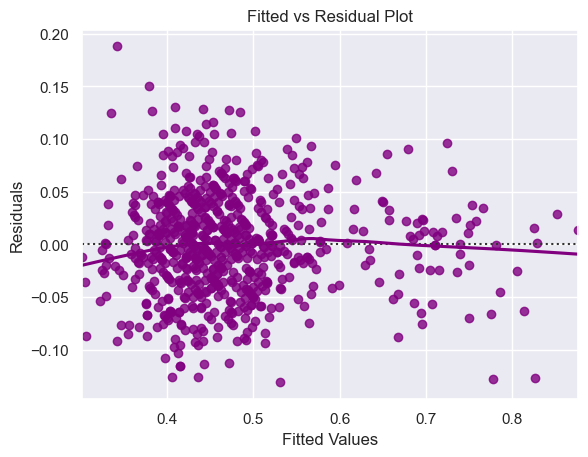

In [280]:
# let's plot the fitted values vs residuals

sns.residplot(data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual Plot")
plt.show()

# We see no pattern in the plot. Hence, the assumptions of linearity and independence are satisfied

### C. Test for Normality

- We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.
- If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
- If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

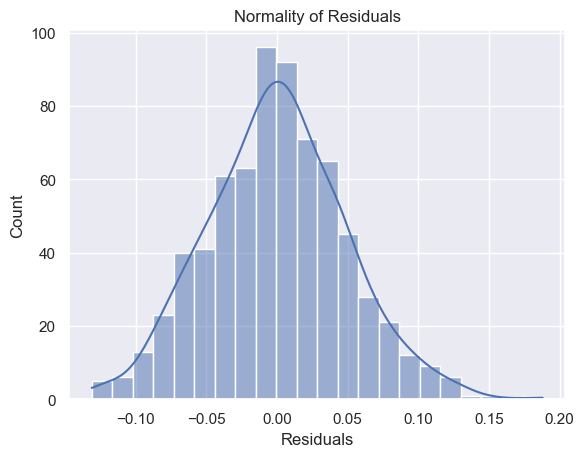

In [282]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of Residuals")
plt.show()

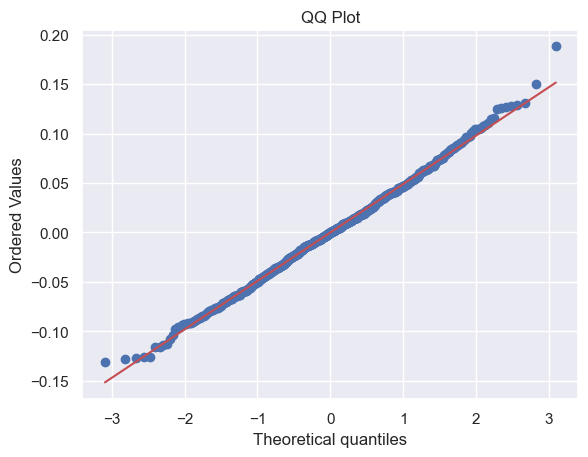

In [283]:
# Lets check QQ Plot
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.title('QQ Plot')
plt.show()

In [284]:
# Lets check the Shapiro-Wilks test
stats.shapiro(df_pred["Residuals"])

#Since p-value > 0.05, the residuals are normal as per the Shapiro-Wilk test

ShapiroResult(statistic=0.9973155427169234, pvalue=0.31085896470043806)

### D. Test for Homoscedasticity


- We will test for homoscedasticity by using the goldfeldquandt test.
- If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.

In [287]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train2)
lzip(name, test)

#Since p-value > 0.05, we can say that the residuals are homoscedastic as per the goldfeldquandt test

[('F statistic', 1.131361290420075), ('p-value', 0.12853551819087372)]

## 5. Model Performance Evaluation

## Final Model Summary

In [290]:
x_train_final = x_train2.copy()
x_test_final = x_test2.copy()

olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     233.8
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          7.03e-224
Time:                        14:58:48   Log-Likelihood:                 1120.2
No. Observations:                 700   AIC:                            -2216.
Df Residuals:                     688   BIC:                            -2162.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [291]:
# predictions on the test set
pred = round(olsmodel_final.predict(x_test_final),2)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
983,0.43,0.43
194,0.51,0.50
314,0.48,0.43
429,0.41,0.49
267,0.41,0.49
746,0.68,0.68
186,0.62,0.60
964,0.48,0.50
676,0.42,0.49
320,0.58,0.56


In [292]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.048841,0.038385,0.788937,0.785251,8.595246


In [293]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.051109,0.041299,0.761753,0.751792,9.177097


In [294]:
# let's check the final model parameters (i.e. model coefficients with column names)
olsmodel_final.params

const                     0.074671
visitors                  0.129096
views_trailer             0.002331
major_sports_event_Yes   -0.060555
dayofweek_Monday          0.032066
dayofweek_Saturday        0.057029
dayofweek_Sunday          0.034386
dayofweek_Thursday        0.015449
dayofweek_Wednesday       0.046495
season_Spring             0.022605
season_Summer             0.043391
season_Winter             0.028231
dtype: float64

In [295]:
# Lets write the Final Equation of linear regression
Equation = "views_content ="
print(Equation, end=" ")
for i in range(len(x_train_final.columns)):
    if i == 0:
        print(olsmodel_final.params[i], "+", end=" ")
    elif i != len(x_train_final.columns) - 1:
        print(
            olsmodel_final.params[i],
            "* (",
            x_train_final.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsmodel_final.params[i], "* (", x_train_final.columns[i], ")")

views_content = 0.07467052053721267 + 0.12909581825894126 * ( visitors ) +  0.002330816786164013 * ( views_trailer ) +  -0.06055507818137332 * ( major_sports_event_Yes ) +  0.03206580679023629 * ( dayofweek_Monday ) +  0.057028596601651195 * ( dayofweek_Saturday ) +  0.034386229923625 * ( dayofweek_Sunday ) +  0.01544944176997319 * ( dayofweek_Thursday ) +  0.04649480366984812 * ( dayofweek_Wednesday ) +  0.022604915818118004 * ( season_Spring ) +  0.04339100263609978 * ( season_Summer ) +  0.028230557183976823 * ( season_Winter )


C:\Users\Maheep-Zephyrus\AppData\Local\Temp\ipykernel_36224\1469509383.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(olsmodel_final.params[i], "+", end=" ")
C:\Users\Maheep-Zephyrus\AppData\Local\Temp\ipykernel_36224\1469509383.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  olsmodel_final.params[i],
C:\Users\Maheep-Zephyrus\AppData\Local\Temp\ipykernel_36224\1469509383.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[po

* The model is able to explain ~79% of the variation in the data

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting

* The MAPE on the test set suggests we can predict within 9.2% of the view contents.

* Hence, we can conclude the model *olsmodel_final* is good for prediction as well as inference purposes

## 6. Actionable Insights and Recommendations

 - Please refer Business Report

---------